## Projeto

O projeto deste módulo será uma aplicação prática do conteúdo de visualização de dados no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) implementando gráficos para tornar o resultado visual. Lembre-se de explorar as bibliotecas estudadas neste módulo (Pandas, Matplotlib, Plotly, Seaborn)  
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição**  
Os trios/quarteto estão descritas segundo o excel "Equipes_projeto" na pasta do Drive
https://drive.google.com/drive/folders/1iq0Yi94_hI7nQHvOFod8NN_Y2iCT8sci?usp=sharing
  
**Github**  
Na mesma planilha das equipes, apenas um integrante do grupo, insira o link para o github  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso de todas bibliotecas apresentadas neste módulo para criação de gráficos (ao menos um gráfico de cada biblioteca)
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários
4. Uso dos diferentes tipos de gráficos com as variáveis numéricas e categóricas 
5. Identificação e discussão de missings ou outliers na base de dados
6. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
01/08/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
df_customer = pd.read_csv('./data/marketing_campaign.csv', sep='\t')

In [68]:
pd.set_option("display.max_columns", 100)

In [69]:
df_customer.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [71]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [72]:
df_customer.drop(['Z_Revenue', 'Z_CostContact'], axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [73]:
#Total_Children = Filhos totais (Kid+Teen)
df_customer['Total_Children'] = df_customer['Kidhome'] + df_customer['Teenhome']

In [74]:
df_customer['MntTotal'] = df_customer['MntWines'] + df_customer['MntFruits'] + df_customer['MntMeatProducts'] + df_customer['MntFishProducts'] + df_customer['MntSweetProducts'] + df_customer['MntGoldProds']

In [75]:
df_customer['oferta_aceita'] = df_customer.AcceptedCmp1 + df_customer.AcceptedCmp2 + df_customer.AcceptedCmp3 + df_customer.AcceptedCmp4 + df_customer.AcceptedCmp5
df_customer['oferta_aceita'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: oferta_aceita, dtype: int64

In [76]:
df_customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children,MntTotal,oferta_aceita
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214,0.297768
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288,0.678381
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,4.000000


<AxesSubplot:xlabel='tem_criancas'>

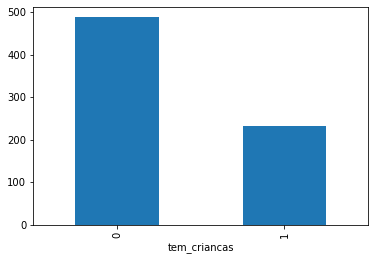

In [77]:
df_customer['tem_criancas'] = df_customer.Total_Children.apply(lambda x: 0 if x == 0 else 1)
filhos = df_customer.groupby(by = 'tem_criancas').mean()
filhos.MntWines.plot(kind = 'bar')


In [78]:
df_customer['tem_criancas'].value_counts()

1    1602
0     638
Name: tem_criancas, dtype: int64

In [79]:
correcao_nomes = {'YOLO':'Single',
            'Alone':'Single',
            'Absurd' :'Single',}

df_customer = df_customer.replace(correcao_nomes)

<AxesSubplot:xlabel='Marital_Status'>

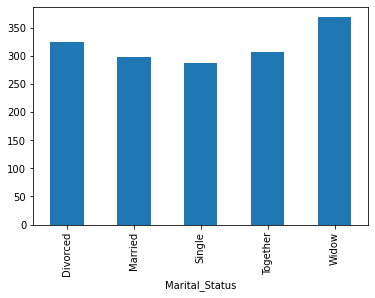

In [80]:
estado_civil = df_customer.groupby(by = 'Marital_Status')
estado_civil.mean().MntWines.plot(kind = 'bar')

<AxesSubplot:xlabel='tem_criancas'>

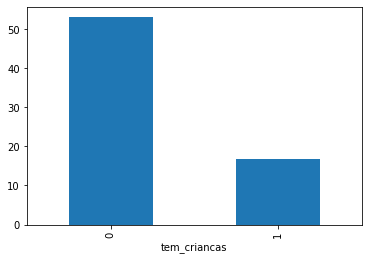

In [81]:
filhos.MntSweetProducts.plot(kind = 'bar')

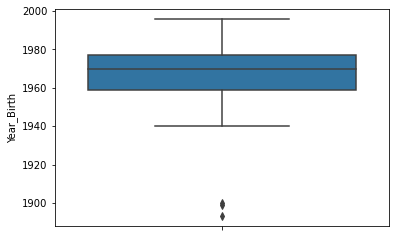

In [82]:
sns.boxplot(data=df_customer, y='Year_Birth');

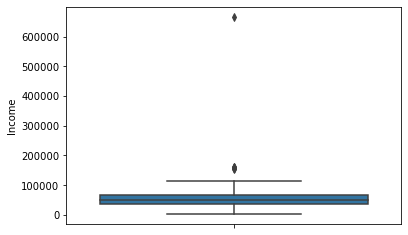

In [83]:
sns.boxplot(data=df_customer, y='Income');

In [84]:
df_customer[df_customer['Income'] == 666666.0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children,MntTotal,oferta_aceita,tem_criancas
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,1,62,0,1


In [85]:
df_customer = df_customer.drop(index=2233)

In [86]:
df_customer['oferta_aceita'] = df_customer['oferta_aceita'].apply(lambda x: 0 if x == 0 else 1)

In [87]:
df_teste = df_customer.pivot_table(index='Marital_Status', values='oferta_aceita', aggfunc='mean')
px.bar(df_teste, barmode='group')

In [88]:
df_teste = df_customer.groupby(by=['Marital_Status','oferta_aceita'])['oferta_aceita'].count()
#px.bar(df_teste, barmode='group')
df_teste

Marital_Status  oferta_aceita
Divorced        0                186
                1                 46
Married         0                682
                1                182
Single          0                387
                1                100
Together        0                463
                1                116
Widow           0                 58
                1                 19
Name: oferta_aceita, dtype: int64

In [89]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
detect_outlier(df_customer['Income'])

[157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0]

In [90]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_customer = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_customer

df_customer = outliers(df_customer, 'Year_Birth')

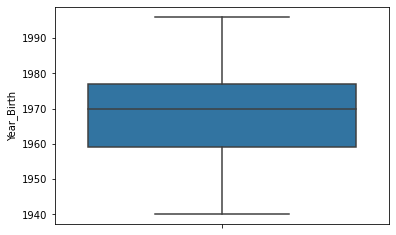

In [91]:
sns.boxplot(data=df_customer, y='Year_Birth');

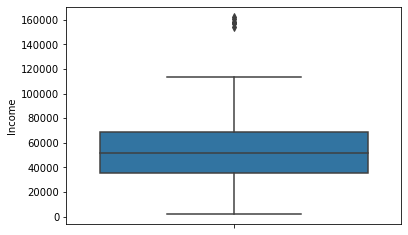

In [92]:
sns.boxplot(data=df_customer, y='Income');

In [93]:
px.scatter(data_frame=df_customer, x='Year_Birth', y='Income', color='Education')

correcao_nomes = {'YOLO':'Single',
            'Alone':'Single',
            'Absurd' :'Single',
            'Together' : 'Married'}

df_customer = df_customer.replace(correcao_nomes)

In [94]:
px.scatter(data_frame=df_customer, x='Year_Birth', y='MntWines', color='Marital_Status')

% de consumo de vinho sobre a renda anual.

In [95]:
px.scatter(data_frame=df_customer, x='Year_Birth', y='NumWebPurchases', color='Marital_Status')

In [96]:

df_visit = df_customer.pivot_table(index='NumWebVisitsMonth', columns='Marital_Status', values='Income', aggfunc='sum')
px.line(df_visit)

In [97]:
df_teste = df_customer.pivot_table(index='Education', values='NumWebPurchases', aggfunc='sum')
px.bar(df_teste, barmode='group')

In [98]:
df_teste = df_customer.pivot_table(index='Education', values='NumDealsPurchases', columns='Marital_Status', aggfunc='sum')
px.bar(df_teste, barmode='group')

In [99]:
df_teste = df_customer.pivot_table(index='Education', values='NumCatalogPurchases', columns='Marital_Status', aggfunc='sum')
px.bar(df_teste, barmode='group')

In [100]:
df_teste = df_customer.pivot_table(index='Education', values='NumStorePurchases', columns='Marital_Status', aggfunc='sum')
px.bar(df_teste, barmode='group')

In [101]:
px.scatter(data_frame=df_customer, x='MntSweetProducts', y='Kidhome', color='Marital_Status')

Agrupar quem tem filho e quem não tem e verificarmos a media

In [102]:
px.histogram(df_customer, 'Income', nbins=20)

In [103]:
px.histogram(df_customer, 'Education', nbins=20)

In [104]:
df_customer['Age'] = 2022 - df_customer['Year_Birth']

In [105]:

df_internet = df_customer.pivot_table(index='Age', values='NumWebVisitsMonth', columns='Marital_Status', aggfunc='sum')

px.line(df_internet)

In [106]:
df_internet = df_customer.groupby(by = 'Age').mean().NumWebVisitsMonth
px.line(df_internet)

In [107]:

df_store = df_customer.pivot_table(index='Age', values='NumStorePurchases', columns='Marital_Status', aggfunc='sum')

px.line(df_store)

In [108]:
perfil_consumo = estado_civil.mean()[['MntFruits', 'MntWines', 'MntMeatProducts',
                                      'MntFishProducts', 'MntGoldProds']].T
perfil_consumo

Marital_Status,Divorced,Married,Single,Together,Widow
MntFruits,27.426724,25.734954,26.833676,25.350000,33.090909
MntWines,324.844828,299.480324,288.106776,306.825862,369.272727
MntMeatProducts,150.206897,160.681713,181.141684,168.103448,189.285714
MntFishProducts,35.043103,35.380787,38.574949,38.991379,51.389610
MntGoldProds,46.288793,42.822917,44.277207,42.994828,56.766234


In [109]:
for i in perfil_consumo.columns:
    perfil_consumo[i] = perfil_consumo[i]/perfil_consumo[i].sum()

In [110]:
perfil_consumo

Marital_Status,Divorced,Married,Single,Together,Widow
MntFruits,0.046979,0.045621,0.046350,0.043537,0.047286
MntWines,0.556422,0.530899,0.497650,0.526952,0.527679
MntMeatProducts,0.257287,0.284846,0.312888,0.288706,0.270483
MntFishProducts,0.060025,0.062721,0.066631,0.066965,0.073434
MntGoldProds,0.079287,0.075914,0.076481,0.073841,0.081117


<AxesSubplot:ylabel='Marital_Status'>

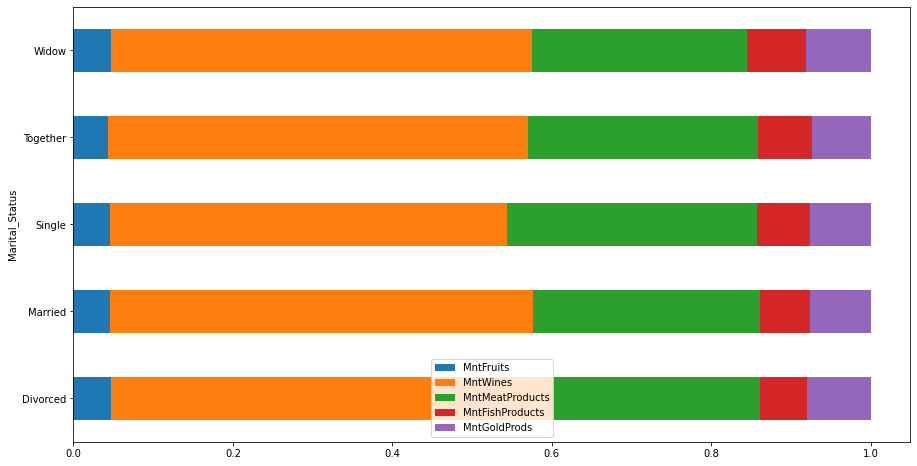

In [111]:
ax = perfil_consumo.T.plot(kind = 'barh', stacked = True, figsize = (15, 8))
ax

<AxesSubplot:ylabel='Education'>

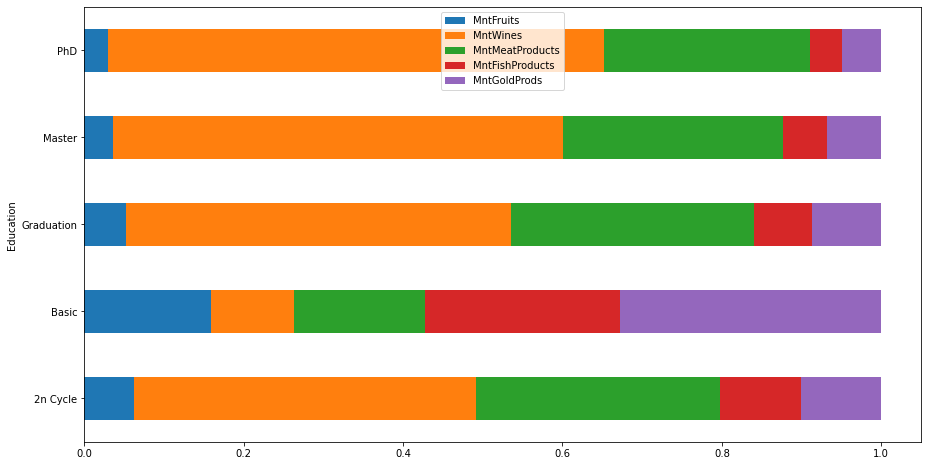

In [112]:
escolaridade = df_customer.groupby(by = 'Education')
perfil_consumo_escolaridade = escolaridade.mean()[['MntFruits', 'MntWines', 'MntMeatProducts',
                                                   'MntFishProducts', 'MntGoldProds']].T
for i in perfil_consumo_escolaridade.columns:
    perfil_consumo_escolaridade[i] = perfil_consumo_escolaridade[i]/perfil_consumo_escolaridade[i].sum()
ax = perfil_consumo_escolaridade.T.plot(kind = 'barh', stacked = True, figsize = (15, 8))
ax

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

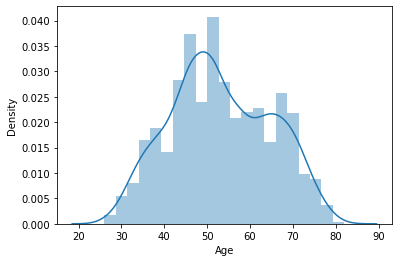

In [113]:
sns.distplot(df_customer.Age)

In [114]:
totals = [perfil_consumo.Divorced.sum(), perfil_consumo.Married.sum(), perfil_consumo.Single.sum(),
          perfil_consumo.Together.sum(), perfil_consumo.Widow.sum()]
totals

[1.0000000000000002,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 0.9999999999999998]

In [115]:
valor_minimo = df_customer['Age'].min()
valor_minimo

26

In [116]:
valor_maximo = df_customer['Age'].max()
rotulos = ['Jovens Adultos', 'Adultos', 'Idosos']
classes = [valor_minimo, 40, 60, valor_maximo]

In [117]:
df_customer['classificacao_idade'] = pd.cut(x = df_customer['Age'], bins = classes, labels = rotulos, include_lowest = True)

<AxesSubplot:xlabel='classificacao_idade'>

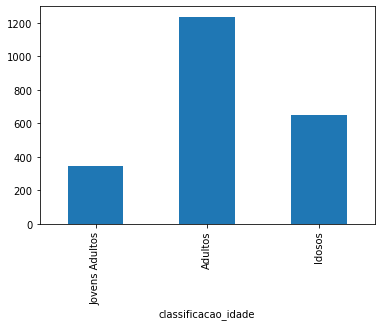

In [118]:
df_customer.groupby(by = df_customer['classificacao_idade']).ID.count().plot(kind='bar')

<AxesSubplot:ylabel='classificacao_idade'>

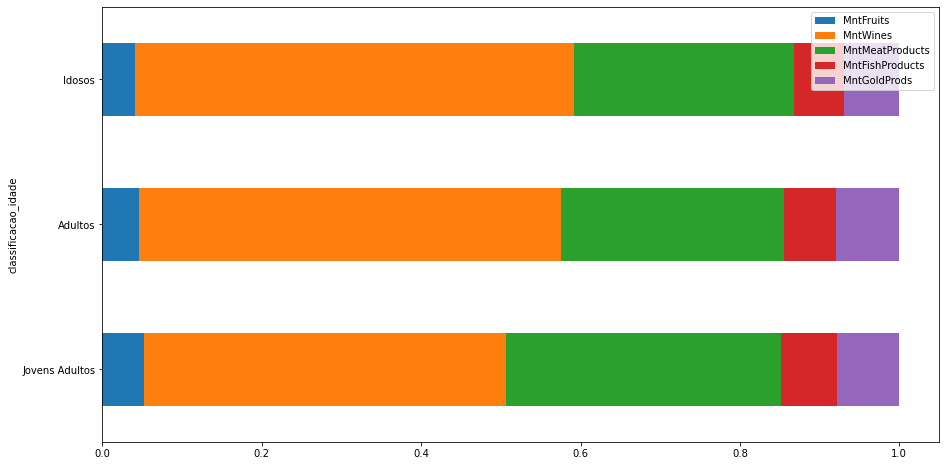

In [119]:
classificacao_idade = df_customer.groupby(by = 'classificacao_idade')
perfil_consumo_idade = classificacao_idade.mean()[['MntFruits', 'MntWines', 'MntMeatProducts',
                                                   'MntFishProducts', 'MntGoldProds']].T
for i in perfil_consumo_idade.columns:
    perfil_consumo_idade[i] = perfil_consumo_idade[i]/perfil_consumo_idade[i].sum()
ax = perfil_consumo_idade.T.plot(kind = 'barh', stacked = True, figsize = (15, 8))
ax

In [120]:
preferencia_compra_idade = classificacao_idade.mean()[['NumWebPurchases', 'NumDealsPurchases',
                                                       'NumCatalogPurchases', 'NumStorePurchases']].T
for i in preferencia_compra_idade.columns:
    preferencia_compra_idade[i] = preferencia_compra_idade[i]/preferencia_compra_idade[i].sum()

In [121]:
preferencia_compra_idade

classificacao_idade,Jovens Adultos,Adultos,Idosos
NumWebPurchases,0.264287,0.277679,0.274444
NumDealsPurchases,0.131014,0.171899,0.140926
NumCatalogPurchases,0.193133,0.165243,0.196389
NumStorePurchases,0.411565,0.385179,0.388241


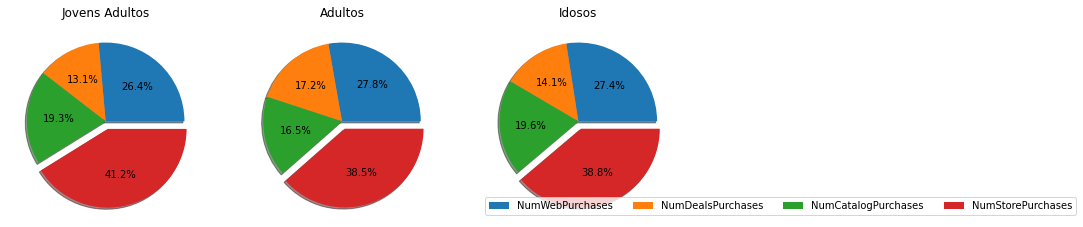

In [142]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)

# fig.suptitle('Vendas de carros', fontsize=15, y=1.01)
# axs[0].pie('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', label = 'HB20')
# axs[1].pie('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', label = 'Onix')
# axs[2].pie('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', label = 'Sandero')


# axs[0].set(ylabel='Quantidade', title='HB20')
# axs[1].set(xlabel='Mês', title='Onix')
# axs[2].set(title='Sandero');
explodir = [0., 0, 0, 0.1] 

axs[0].pie(preferencia_compra_idade['Jovens Adultos'], autopct='%.1f%%', explode = explodir, shadow = True)
axs[0].set(title='Jovens Adultos')

axs[1].pie(preferencia_compra_idade['Adultos'], autopct='%.1f%%', explode = explodir, shadow = True)
axs[1].set(title='Adultos')

axs[2].pie(preferencia_compra_idade['Idosos'], autopct='%.1f%%', explode = explodir, shadow = True)
axs[2].set(title='Idosos')

plt.legend(preferencia_compra_idade.index, ncol = 4)

In [123]:
explodir = [0.1, 0, 0.1, 0.1] 

axs[0].pie(preferencia_compra_idade['Jovens Adultos'], labels=preferencia_compra_idade.index,
        autopct='%.1f%%', explode = explodir, shadow = True) # adicionando a sobra

# axs[0].pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index,
#         autopct='%.1f%%', explode = explodir, shadow = True)

# axs[0].pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index,
#         autopct='%.1f%%', explode = explodir, shadow = True)
# axs[1].set_title('Temperatura', fontsize=15, pad=10)

([<matplotlib.patches.Wedge at 0x29799731c40>,
 [Text(0.8096001792993724, 0.8857468880433191, 'NumWebPurchases'),
  Text(-0.5286835857377443, 0.9646209961282624, 'NumDealsPurchases'),
  Text(-1.1984339571840297, 0.06128662389320752, 'NumCatalogPurchases'),
  Text(0.32911812282121533, -1.1539849484419802, 'NumStorePurchases')],
 [Text(0.47226677125796723, 0.5166856846919361, '26.4%'),
  Text(-0.2883728649478605, 0.5261569069790522, '13.1%'),
  Text(-0.6990864750240173, 0.03575053060437105, '19.3%'),
  Text(0.19198557164570892, -0.6731578865911549, '41.2%')])

(0.0, 110000.0)

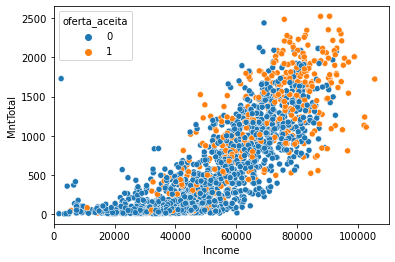

In [124]:
sns.scatterplot(data=df_customer, x='Income', y='MntTotal', hue='oferta_aceita')
plt.xlim([0,110000])

(0.0, 110000.0)

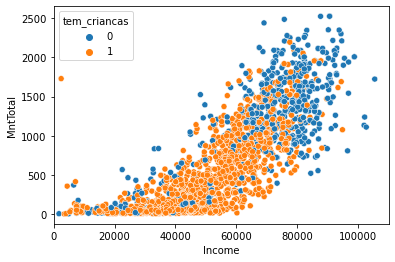

In [125]:
sns.scatterplot(data=df_customer, x='Income', y='MntTotal', hue='tem_criancas')
plt.xlim([0,110000])

In [138]:
rotulos = ['Baixa Renda', 'Média Renda', 'Alta Renda']
classes = [0, 30000, 60000, 1000000]
df_customer['classificacao_renda'] = pd.cut(x = df_customer['Income'], bins = classes, labels = rotulos, include_lowest = True)

In [139]:
df_customer.groupby(by = 'classificacao_renda').ID.count()

classificacao_renda
Baixa Renda     370
Média Renda    1004
Alta Renda      838
Name: ID, dtype: int64

<AxesSubplot:xlabel='classificacao_renda'>

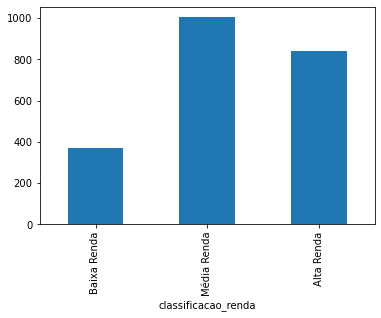

In [140]:
df_customer.groupby(by = 'classificacao_renda').ID.count().plot(kind = 'bar')

NumDealsPurchases    2240 non-null   int64  
 16  NumWebPurchases      2240 non-null   int64  
 17  NumCatalogPurchases  2240 non-null   int64  
 18  NumStorePurchases